Nom 1: Eric Escrich

Nom 2: Adrià Vilariño

# Repte 5B: Detecció d'objectes

*   Elemento de lista
*   Elemento de lista



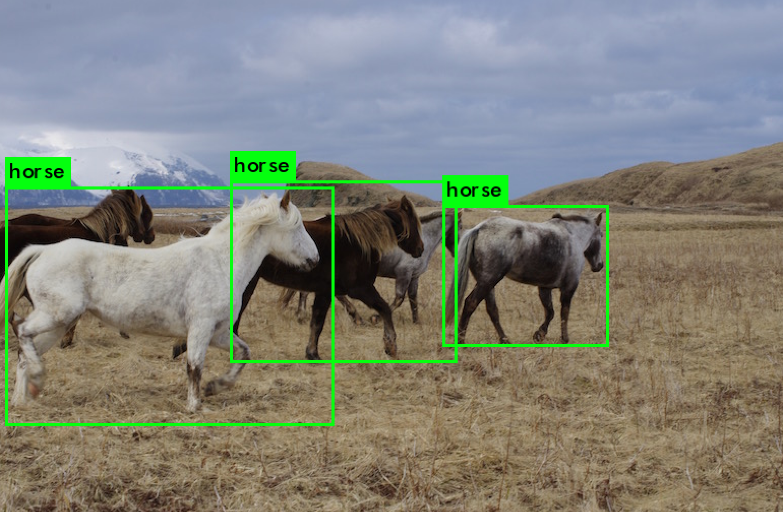

## Enunciat

En aquest repte crearem un sistema que aprofitarà l'arquitectura **YOLO** *(You Only Look Once)* per detectar i localitzar objectes dins d'una imatge. Farem servir una xarxa pre-entrenada i la llibreria **OpenCV**.

### Pregunta 1
De quin tipus de problema es tracta?

Es un problema de detecció d'objectes, que combina classificació i regressió de coordenades espacials.

## 1
El primer que farem serà descarregar els fitxers amb l'arquitectura de la xarxa neuronal i els pesos de les neurones. Automatitza el procés de descàrrega.

In [ ]:
# Descarrega els fitxers necessaris
# Arquitectura
# https://opencv-tutorial.readthedocs.io/en/latest/_downloads/10e685aad953495a95c17bfecd1649e5/yolov3.cfg
# Pesos
# https://pjreddie.com/media/files/yolov3.weights
# Etiquetes amb els noms dels objectes
# https://opencv-tutorial.readthedocs.io/en/latest/_downloads/a9fb13cbea0745f3d11da9017d1b8467/coco.names

# Aprofitarem també per descarregar algunes imatges per fer proves. Pots afegir més
# https://opencv-tutorial.readthedocs.io/en/latest/_downloads/472b3f5c57e7cb5943e7d46b33e42dd0/horse.jpg
# https://keras.io/img/guides/object_detection_keras_cv/object_detection_keras_cv_8_1.png
# https://upload.wikimedia.org/wikipedia/commons/thumb/6/60/Naxos_Taverna.jpg/1200px-Naxos_Taverna.jpg



In [ ]:
import os
import requests

def download_file(url, save_path):
    """Descarrega un fitxer des d'una URL i el desa en el directori especificat."""
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(save_path, 'wb') as f:
            for chunk in response.iter_content(chunk_size=1024):
                f.write(chunk)
        print(f"Descarregat: {save_path}")
    else:
        print(f"Error descarregant {url}")

# Directori on es guardaran els fitxers
download_dir = "yolo_files"
os.makedirs(download_dir, exist_ok=True)

# URLs dels fitxers necessaris
files = {
    "yolov3.cfg": "https://opencv-tutorial.readthedocs.io/en/latest/_downloads/10e685aad953495a95c17bfecd1649e5/yolov3.cfg",
    "yolov3.weights": "https://pjreddie.com/media/files/yolov3.weights",
    "coco.names": "https://opencv-tutorial.readthedocs.io/en/latest/_downloads/a9fb13cbea0745f3d11da9017d1b8467/coco.names",
    "horse.jpg": "https://opencv-tutorial.readthedocs.io/en/latest/_downloads/472b3f5c57e7cb5943e7d46b33e42dd0/horse.jpg",
    "object_detection.png": "https://keras.io/img/guides/object_detection_keras_cv/object_detection_keras_cv_8_1.png",
    "naxos_taverna.jpg": "https://upload.wikimedia.org/wikipedia/commons/thumb/6/60/Naxos_Taverna.jpg/1200px-Naxos_Taverna.jpg"
}

# Descarregar tots els fitxers
for filename, url in files.items():
    save_path = os.path.join(download_dir, filename)
    download_file(url, save_path)

print("Tots els fitxers s'han descarregat correctament.")

Descarregat: yolo_files/yolov3.cfg
Descarregat: yolo_files/yolov3.weights
Descarregat: yolo_files/coco.names
Descarregat: yolo_files/horse.jpg
Descarregat: yolo_files/object_detection.png
Descarregat: yolo_files/naxos_taverna.jpg
Tots els fitxers s'han descarregat correctament.


In [ ]:
# Importa llibreries OpenCV, numpy

# Llegeix i mostra la imatge amb OpenCV

# Llegeix les classes (tipus d'objectes) del fitxer coco.names

# Crea un model amb la configuració i els pesos que hem descarregat fent servir
# la funció cv2.dnn.readNetFromDarknet



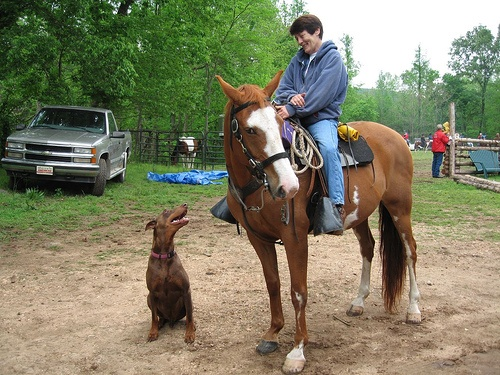

Classes carregades: 80
Model YOLO carregat correctament.


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Carregar i mostrar la imatge
image_path = "yolo_files/horse.jpg"
image = cv2.imread(image_path)
cv2_imshow(image)

# Llegeix les classes del fitxer coco.names
coco_names_path = "yolo_files/coco.names"
with open(coco_names_path, "r") as f:
    classes = [line.strip() for line in f.readlines()]

print(f"Classes carregades: {len(classes)}")

# Crea el model YOLO
cfg_path = "yolo_files/yolov3.cfg"
weights_path = "yolo_files/yolov3.weights"

net = cv2.dnn.readNetFromDarknet(cfg_path, weights_path)
print("Model YOLO carregat correctament.")


## 2
La imatge que entrarà a la xarxa neuronal ha de tenir el format BGR en comptes de RGB ja que és el que fa servir OpenCV, pixels normalitzats i dimensió 416x416.

In [ ]:
# Realitza aquesta transformació amb la funció cv2.dnn.blobFromImage


# Determinem quina és la capa de sortida


# Aplica la imatge transformada a l'entrada del model i guarda la sortida en una variable


# Analitza la sortida que ens dóna la xarxa neuronal i mostra els objectes
# detectats i la seva posició



In [ ]:
# Transformar la imatge a BGR, normalitzar i ajustar a 416x416
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=False, crop=False)

# Determinar les capes de sortida
layer_names = net.getLayerNames()
out_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Aplicar la imatge transformada al model
net.setInput(blob)
outputs = net.forward(out_layers)

# Analitzar la sortida i mostrar els objectes detectats
height, width = image.shape[:2]
boxes = []
confidences = []
class_ids = []

for output in outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            box = detection[0:4] * np.array([width, height, width, height])
            (center_x, center_y, w, h) = box.astype("int")
            x = int(center_x - (w / 2))
            y = int(center_y - (h / 2))
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            print(f"Objecte detectat: \033[1m{classes[class_id]}\033[0m | Confiança: \033[1m{confidence:.2f}\033[0m | Posició: \033[1m({x}, {y}, {w}, {h})\033[0m")

# Supressió de no màxims
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)


Objecte detectat: person | Confiança: 0.93 | Posició: (266, 10, 95, 203)
Objecte detectat: truck | Confiança: 0.64 | Posició: (8, 97, 123, 90)
Objecte detectat: person | Confiança: 0.69 | Posició: (244, 17, 111, 212)
Objecte detectat: person | Confiança: 0.96 | Posició: (262, 15, 105, 212)
Objecte detectat: truck | Confiança: 0.76 | Posició: (5, 106, 127, 88)
Objecte detectat: truck | Confiança: 0.71 | Posició: (9, 105, 138, 88)
Objecte detectat: horse | Confiança: 0.96 | Posició: (221, 63, 196, 269)
Objecte detectat: horse | Confiança: 0.68 | Posició: (217, 69, 173, 289)
Objecte detectat: horse | Confiança: 1.00 | Posició: (211, 75, 214, 277)
Objecte detectat: horse | Confiança: 0.75 | Posició: (219, 57, 213, 310)
Objecte detectat: person | Confiança: 0.68 | Posició: (265, 13, 79, 197)
Objecte detectat: person | Confiança: 0.97 | Posició: (273, 13, 78, 197)
Objecte detectat: person | Confiança: 0.91 | Posició: (267, 13, 76, 214)
Objecte detectat: person | Confiança: 0.99 | Posició: (2

La sortida són vectors de dimensió 85 classificats en funció de si són objectes grans, mitjans o petits, on:



*   4 pel requadre que conté l'objecte (centre x, centre y, amplada i alçada)
*   1 Precisió del requadre
*   80 per la precisió de cada classe



## 3
Ara mostrarem la imatge i dibuxarem un requadre a cada objecte detectat. Per fer-ho, selecciona tots el objectes amb un llindar de detecció superior al 50% per després dibuixar a la imatge un recuadre de la mida corresponent i escriure la classe detectada. Pots fer servir les funcions ***cv2.rectangle*** i ***cv2.puttext()***.

In [ ]:
# Selecciona els objectes amb un llindar superior al 50%

# Realitza la supresió de no màxims amb la funció cv2.dnn.NMSBoxes()

# Dibuixa els requadres amb el text de la classe i mostra la imatge


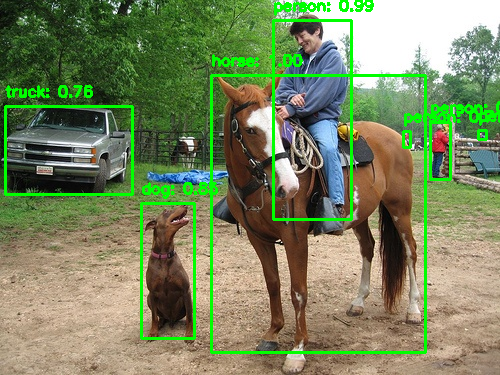

In [ ]:
# Dibuixar els requadres i etiquetes a la imatge
for i in indices.flatten():
    x, y, w, h = boxes[i]
    label = f"{classes[class_ids[i]]}: {confidences[i]:.2f}"
    color = (0, 255, 0)
    cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
    cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Mostrar la imatge amb les deteccions
cv2_imshow(image)


## 4 Opcional 1
Crea una WebApp que permeti pujar una imatge i realitzar la detecció i localització d'objectes. Pots fer servir eines com Flask, ngrok, FastAPI o d'altres.

## 5 Opcional 2

Crea un model **YOLO** o **R-CNN** fent servir Keras/Tensorflow i entrena'l per realitzar detecció d'objectes personalitzats. Pots fer servir tècniques de **transfer learning**.